**1. importing file from drive to content**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi


Sat Feb 25 22:25:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    30W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**2. Calling all libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils.fixes import sklearn
from sklearn import preprocessing, utils
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn import preprocessing
from sklearn import utils


import joblib
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse

import seaborn as sns

**3. Reading csv file using pandas dataframe**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIZZOU/DigitalTwin_AT&T/_2023_DigitalTwinCodes/_20230224_SVR_DecisionTreeScripts/20230224_weather_OccupancyBased.csv')
df = df.iloc[:743,1:] #sparsing columns and rows
print(df.head(3))
df.columns

    id       timestamp             Day  Temperature (degC)  Humidity (%)  \
0  0.0  10/1/2022 0:00  10/1/2022 0:00               11.06          71.0   
1  1.0  10/1/2022 1:00  10/1/2022 1:00                9.83          77.0   
2  2.0  10/1/2022 2:00  10/1/2022 2:00                8.50          82.0   

   Wind Speed (m/s)  Wind Direction (deg)  Pressure (hPa)  PeopleCount(p)  \
0               1.0                  96.0          1020.0            10.0   
1               1.0                  90.0          1020.0             4.0   
2               1.0                  92.0          1020.0             0.0   

   PeoplePerArea(p/m2)  LightingPower(W)  LightingPowerIntensity(W/m2)  \
0             0.038662             300.0                      1.159869   
1             0.015465             300.0                      1.159869   
2             0.000000               0.0                      0.000000   

   EquipmentLoad(W)  EquipmentPowerIntensity(W/m2)  VentilationRate (m3/s)  \
0          

Index(['id', 'timestamp', 'Day', 'Temperature (degC)', 'Humidity (%)',
       'Wind Speed (m/s)', 'Wind Direction (deg)', 'Pressure (hPa)',
       'PeopleCount(p)', 'PeoplePerArea(p/m2)', 'LightingPower(W)',
       'LightingPowerIntensity(W/m2)', 'EquipmentLoad(W)',
       'EquipmentPowerIntensity(W/m2)', 'VentilationRate (m3/s)', 'ACH',
       'CarbonEmissions(lb-co2/h)'],
      dtype='object')

**4. Removing unwanted columns from the dataset**

In [ ]:
df.drop(['id', 'timestamp', 'Day','PeopleCount(p)','LightingPower(W)','EquipmentLoad(W)','VentilationRate (m3/s)'], axis =1, inplace=True)
df.head(3)

,Temperature (degC),Humidity (%),Wind Speed (m/s),Wind Direction (deg),Pressure (hPa),PeoplePerArea(p/m2),LightingPowerIntensity(W/m2),EquipmentPowerIntensity(W/m2),ACH,CarbonEmissions(lb-co2/h)
0,11.06,71.0,1.0,96.0,1020.0,0.038662,1.159869,0.337908,1.034237,1.977770
1,9.83,77.0,1.0,90.0,1020.0,0.015465,1.159869,0.314711,0.711153,1.923205
2,8.50,82.0,1.0,92.0,1020.0,0.000000,0.000000,0.299246,0.495763,1.761687


**5. Taking X for input of ML and y for output**

In [ ]:
#X = df[['PeoplePerArea(p/m2)','LightingPowerIntensity(W/m2)','EquipmentPowerIntensity(W/m2)','ACH']]
X = df[['Temperature (degC)','Humidity (%)','Wind Speed (m/s)','Wind Direction (deg)','Pressure (hPa)','PeoplePerArea(p/m2)','LightingPowerIntensity(W/m2)','EquipmentPowerIntensity(W/m2)','ACH']]
y = df['CarbonEmissions(lb-co2/h)']


In [ ]:
y

0      1.977770
1      1.923205
2      1.761687
3      1.761687
4      1.761687
         ...   
738    1.923205
739    1.923205
740    1.907923
741    1.761687
742    1.761687
Name: CarbonEmissions(lb-co2/h), Length: 743, dtype: float64

**6. Random State**

In [ ]:

# Array of random_state values from 0 to 400
random_states = np.arange(start=0, stop=5000)

# Initialize a list where we'll store the score of each random_state
scores = []

# Initialize search
for state in random_states:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=state)
    svr_linear = SVR(kernel='linear',gamma='scale', C=5, epsilon=0.3)
    svr_linear.fit(X_train,y_train)
    scores.append(svr_linear.score(X_test, y_test))

results = pd.DataFrame({'random_state':random_states, 'score':scores})
RandomState_df = results[results['score'] == results['score'].max()]
RandomState = RandomState_df.iloc[0][0].astype(int)
print("The best Random State Value of this dataset is:", RandomState)

The best Random State Value of this dataset is: 2209


**7. Learning Curve**

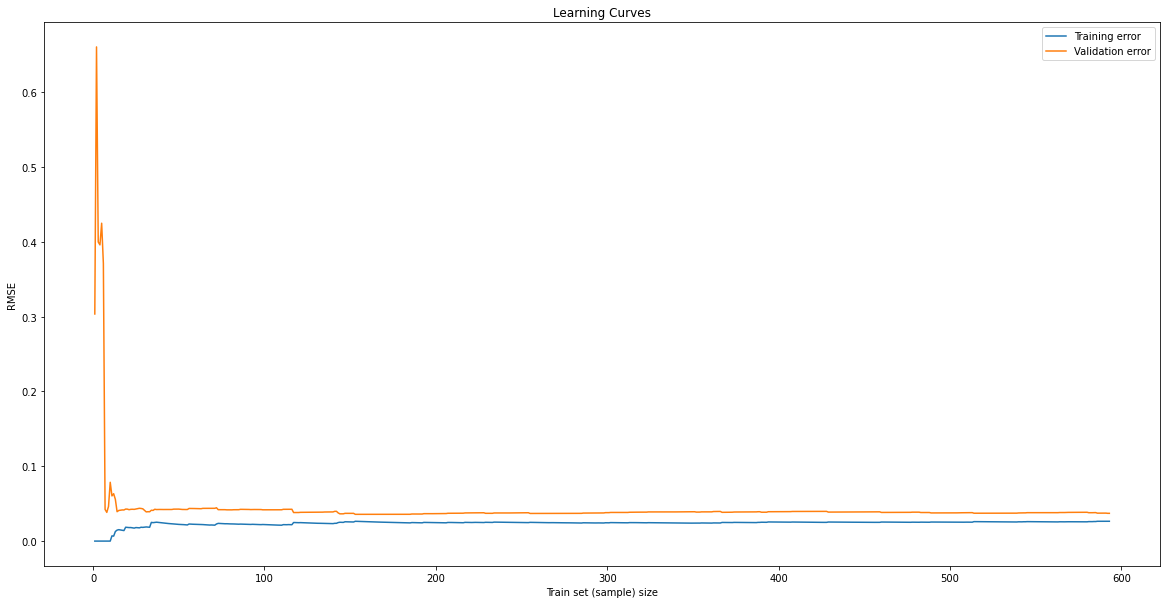

In [ ]:


#Using the random state number for further learning curve and predictions
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=RandomState)

#Learning curve
# https://nvsyashwanth.github.io/machinelearningmaster/learning-curves/
regressor=LinearRegression()
regressor.fit(X_train,y_train)
predictions=regressor.predict(X_test)
plt.figure(1,figsize=(20,10))
train_errors=[]
val_errors=[]
for i in range(1,len(X_train)):
    regressor.fit(X_train[:i],y_train[:i])
    train_preds=regressor.predict(X_train[:i])
    val_preds=regressor.predict(X_test)
    train_errors.append(mse(train_preds,y_train[:i]))
    val_errors.append(mse(val_preds,y_test))
plt.plot(range(1,len(X_train)),np.sqrt(train_errors),label='Training error')
plt.plot(range(1,len(X_train)),np.sqrt(val_errors),label='Validation error')
plt.title('Learning Curves')    
plt.xlabel('Train set (sample) size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

**8. K-Fold Cross-validation**

In [ ]:
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.3,0.4,0.5,1]}

#Selecting the kernel
svr_linear = SVR(kernel='linear')
#Select the folds (c) 
grid = GridSearchCV(svr_linear,param_grid=params,cv=30,scoring='r2',verbose=1,return_train_score=True)
grid.fit(X_train,np.ravel(y_train,order="c"))

#Best estimator
print(grid.best_estimator_)
hyperparam_svr= grid.best_estimator_
print(hyperparam_svr)


Fitting 30 folds for each of 42 candidates, totalling 1260 fits
SVR(C=0.1, kernel='linear')
SVR(C=0.1, kernel='linear')


In [ ]:
C= hyperparam_svr.C
epsilon= hyperparam_svr.epsilon
print(C, epsilon)

0.1 0.1


In [ ]:
#Fit that estimator to the data
svr_best=SVR(kernel='linear',gamma='scale', C=C, epsilon=epsilon)
svr_best.fit(X_train,np.ravel(y_train,order="c"))
print("R2 value for Linear Kernelized SVR:", svr_best.score(X_test,y_test))
print("RMSE for Linear kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_best.predict(X_test))))

R2 value for Linear Kernelized SVR: 0.9821682750695624
RMSE for Linear kernelized SVR: 0.03907903134036004


**9. Final Prediction**

In [ ]:
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X_train)
#y = sc_y.fit_transform(y_train)

sc_X = preprocessing.StandardScaler()
sc_y = preprocessing.StandardScaler()
X = sc_X.fit_transform(X_train)


In [ ]:
#automatically selecting c and epsilon
svr_linear = SVR(kernel='linear',gamma='scale', C=C, epsilon=epsilon)
#svr_linear.fit(X_train, y_train) 
svr_linear.fit(X_train,np.ravel(y_train,order="c"))

SVR(C=0.1, kernel='linear')

In [ ]:
y

0      1.977770
1      1.923205
2      1.761687
3      1.761687
4      1.761687
         ...   
738    1.923205
739    1.923205
740    1.907923
741    1.761687
742    1.761687
Name: CarbonEmissions(lb-co2/h), Length: 743, dtype: float64

**10. Save ML-based Prediction Model**

In [ ]:
filename = "/content/drive/MyDrive/MIZZOU/DigitalTwin_AT&T/_2023_DigitalTwinCodes/_20230224_SVR_DecisionTreeScripts/DigitalTwin_SVR_2.joblib"
joblib.dump(svr_linear, filename)

['/content/drive/MyDrive/MIZZOU/DigitalTwin_AT&T/_2023_DigitalTwinCodes/_20230224_SVR_DecisionTreeScripts/DigitalTwin_SVR_2.joblib']

**11. Load ML-based Prediction Model and check prediction accuracy**

In [ ]:
#Import prediction model
prediction_model = joblib.load(filename)
prediction_model

#rerun the prediction after getting the new c and epsilon values
y_pred = prediction_model.predict(X_test)
WriteData = pd.DataFrame({'Physics-based Modeling Results in lb-CO2/kWh':y_test, 'Machine Learning-based Modeling Results in lb-CO2/kWh':y_pred})
print(WriteData)

#Accuracy check
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
R_square = metrics.r2_score(y_test, y_pred)
# Printing the metrics
print('R2 square:',R_square)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)


     Physics-based Modeling Results in lb-CO2/kWh  \
579                                      1.761687   
105                                      2.733562   
301                                      2.306009   
587                                      2.393312   
741                                      1.761687   
..                                            ...   
394                                      2.733562   
638                                      2.238358   
377                                      1.888943   
625                                      1.761687   
604                                      1.761687   

     Machine Learning-based Modeling Results in lb-CO2/kWh  
579                                           1.774513      
105                                           2.644094      
301                                           2.392321      
587                                           2.479401      
741                                           1.772421    

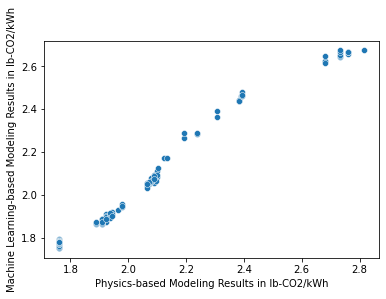

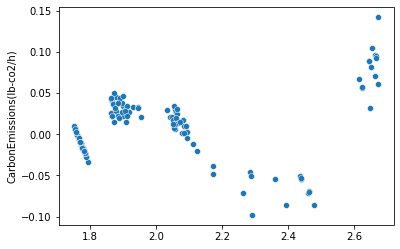

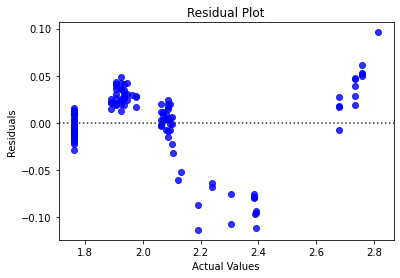

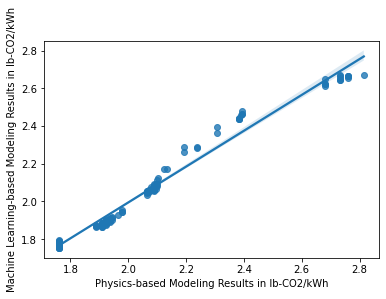

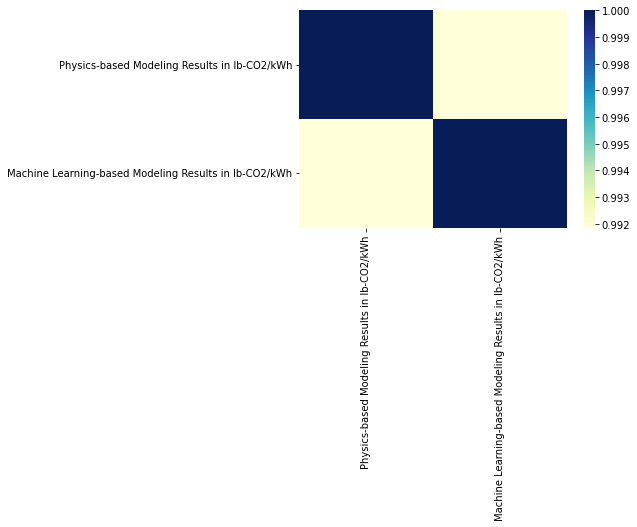

In [ ]:


### Scatter plot

# Create scatter plot of true vs predicted values
scatter = sns.scatterplot(x='Physics-based Modeling Results in lb-CO2/kWh', y='Machine Learning-based Modeling Results in lb-CO2/kWh', data=WriteData)
plt.show()

# Create scatter plot of residuals
residuals = y_test - y_pred
scatter_residual = sns.scatterplot(x=y_pred, y=residuals)
plt.show()

### Residual Plot

import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe to hold the residuals
residuals = y_test - y_pred
residual_df = pd.DataFrame({'residuals': residuals, 'y_test': y_test})

# Create the residual plot using seaborn
sns.residplot(x='y_test', y='residuals', data=residual_df, color='blue')

# Set the plot title and axis labels
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

### Regression plot

# Create scatter plot with regression line
regression = sns.regplot(x='Physics-based Modeling Results in lb-CO2/kWh', y='Machine Learning-based Modeling Results in lb-CO2/kWh', data=WriteData)
plt.show()

### Correlation plot

corr = WriteData.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")
plt.show()

